**IMPORT FILE**

In [ ]:
import os

# Check if the directory 'GUVI' exists
if not os.path.exists("GUVI"):
    # If it doesn't exist, create it
    os.makedirs("GUVI")
    print("Directory 'GUVI' created.")

# Now, you can safely list the contents of the directory
os.listdir("GUVI")

Directory 'GUVI' created.


[]

**UPLOAD DATASET**

In [ ]:
import os
os.listdir("GUVI")

[]

**FILE PATH**

In [ ]:
import pandas as pd
df=pd.read_csv("/GUVI/zomato.csv")

## Install Required Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn openpyxl


**Import All Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


**Initial Exploration**

In [ ]:
df.head()       # First 5 rows
df.shape        # Number of rows and columns
df.columns      # List column names
df.info()
df.describe()       # Data types and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# **Handle Missing Values**

In [ ]:
# Check missing values
print(df.isnull().sum())  # This will show missing values column-wise

# Fill missing values in the 'rate' column with its mode
df['rate'] = df['rate'].fillna(df['rate'].mode()[0])

# Drop rows with any remaining null values
df.dropna(inplace=True)

# Confirm again that no missing values remain
print("\nAfter cleaning:\n")
print(df.isnull().sum())



url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

After cleaning:

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(

# **Clean Data**

In [ ]:

#clean data
print("Columns before dropping:\n", df.columns)

# Verify the exact column names in df.columns before dropping
# If some of the listed columns are not present, remove them from the list.
columns_to_drop = ['url', 'address', 'phone', 'listed_in(city)', 'menu_item']

# Filter the list to only include columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop only the columns that exist
df.drop(existing_columns_to_drop, axis=1, inplace=True)

print("Columns after dropping:\n", df.columns)


Columns before dropping:
 Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)'],
      dtype='object')
Columns after dropping:
 Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'listed_in(type)'],
      dtype='object')


**Clean rate column**

In [ ]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())
# Explicitly create a copy of the filtered DataFrame to avoid SettingWithCopyWarning
df = df[df['rate'] != 'NEW'].copy()
df['rate'] = df['rate'].astype(float)

# **Feature Engineering**

In [ ]:
#Feature Engineering
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})
df.columns = df.columns.str.lower()
# Check unique values to confirm mapping
print("✅ online_order unique values:", df['online_order'].unique())
print("✅ book_table unique values:", df['book_table'].unique())
# Check updated column names
print("\n✅ Column names after lowercase conversion:\n", df.columns.tolist())





✅ online_order unique values: [nan]
✅ book_table unique values: [nan]

✅ Column names after lowercase conversion:
 ['name', 'online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'listed_in(type)']


# **Remove Duplicates**

In [ ]:
# Check number of rows before dropping duplicates
before = df.shape[0]

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check number of rows after dropping duplicates
after = df.shape[0]

# Show how many were removed
print(f" Removed {before - after} duplicate rows.")
print(f" Final dataset shape: {df.shape}")



 Removed 0 duplicate rows.
 Final dataset shape: (19560, 12)


In [ ]:
import pandas as pd
df=pd.read_csv("/content/GUVI/zomato.csv")


# **Visualizations**
Online order availability

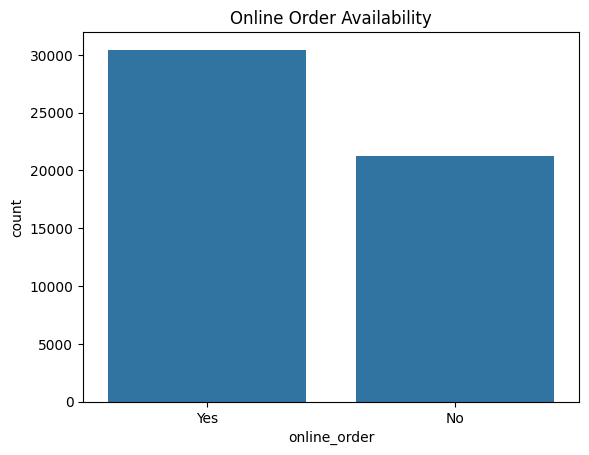

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the cells defining and processing 'df' have been executed
# before running this plotting code.
sns.countplot(x='online_order', data=df)
plt.title("Online Order Availability")
plt.show()

**Top rated locations**

In [ ]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())
# Filter out rows with 'NEW' and also with '-' before converting to float
df = df[(df['rate'] != 'NEW') & (df['rate'] != '-')].copy()
df['rate'] = df['rate'].astype(float)
print(df)

                                                     url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stag

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")



# **Heatmap**

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews

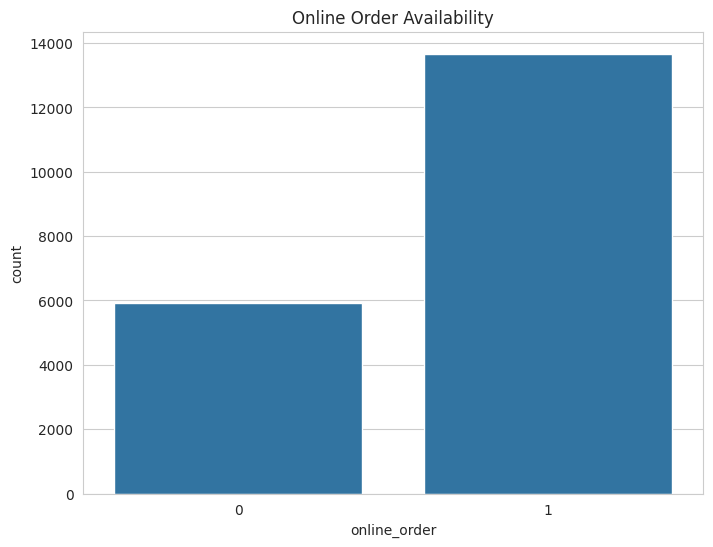

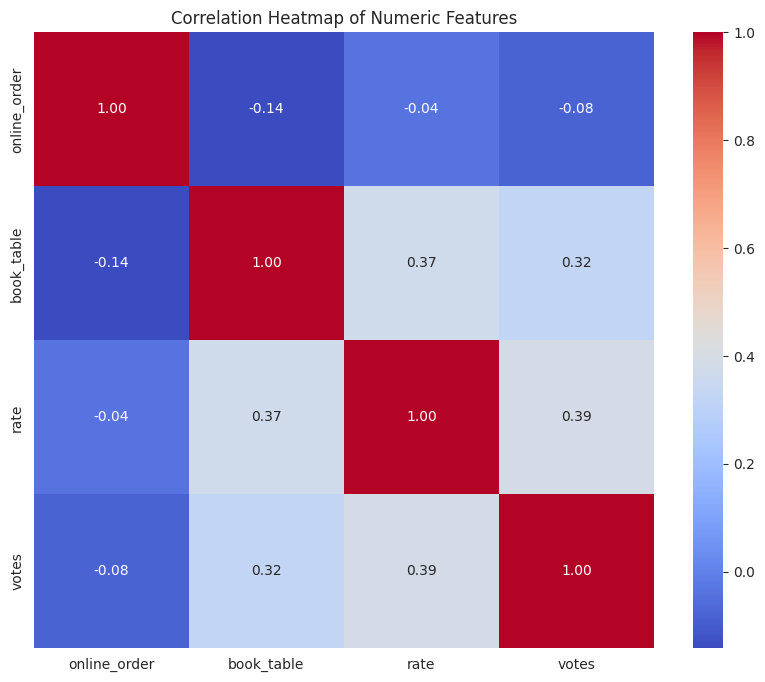

In [ ]:
if not os.path.exists("GUVI"):
    os.makedirs("GUVI")
    print("Directory 'GUVI' created.")

# Load the dataset - ONLY LOAD ONCE
df = pd.read_csv("/content/GUVI/zomato.csv")

# Initial Data Exploration
print("Initial DataFrame Info:")
df.info()
print("\nInitial DataFrame Description:")
print(df.describe())

# Check missing values
print("\nMissing values before cleaning:\n", df.isnull().sum())

try:
    df['rate_numeric_temp'] = pd.to_numeric(df['rate'], errors='coerce')
    # Calculate mode from numeric values, ignore NaNs
    mode_rate = df['rate_numeric_temp'].mode()
    if not mode_rate.empty:
         # Only fill if mode is a valid number
        df['rate'] = df['rate'].fillna(str(mode_rate[0]))
    df = df.drop(columns=['rate_numeric_temp']) # Drop temporary column
except Exception as e:
    print(f"Could not calculate mode for 'rate' safely: {e}")
    print("Proceeding without filling rate NaNs with mode.")


# Drop rows with any remaining null values
df.dropna(inplace=True)

# Confirm again that no missing values remain
print("\nMissing values after dropping NaNs:\n", df.isnull().sum())

# Clean data - Drop irrelevant columns
print("\nColumns before dropping:\n", df.columns.tolist())

columns_to_drop = ['url', 'address', 'phone', 'listed_in(city)', 'menu_item']
# Filter the list to only include columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop only the columns that exist
df.drop(existing_columns_to_drop, axis=1, inplace=True)

print("\nColumns after dropping:\n", df.columns.tolist())

# Clean and convert 'rate' column
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())
# Filter out rows with 'NEW' and also with '-' before converting to float
df = df[(df['rate'] != 'NEW') & (df['rate'] != '-')].copy()
df['rate'] = df['rate'].astype(float)
print("\nDataFrame after cleaning 'rate' column:")
print(df[['rate']].head()) # Display head of rate column to confirm type and values

# Feature Engineering - Map binary columns
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Check unique values to confirm mapping
print("\n✅ online_order unique values:", df['online_order'].unique())
print("✅ book_table unique values:", df['book_table'].unique())
# Check updated column names
print("\n✅ Column names after lowercase conversion:\n", df.columns.tolist())

# Drop duplicate rows
before_drop_duplicates = df.shape[0]
df.drop_duplicates(inplace=True)
after_drop_duplicates = df.shape[0]
print(f"\nRemoved {before_drop_duplicates - after_drop_duplicates} duplicate rows.")
print(f"Final dataset shape: {df.shape}")

# --- NOW THE DATAFRAME IS CLEANED AND READY FOR PLOTTING AND CORRELATION ---

# Example Plotting (from previous cells)
plt.figure(figsize=(8,6))
sns.countplot(x='online_order', data=df)
plt.title("Online Order Availability")
plt.show()

# Calculate and plot Correlation Heatmap
plt.figure(figsize=(10,8)) # Adjusted figure size
# Ensure only numeric columns are included in the correlation calculation
# Select numeric columns explicitly or let df.corr() handle it (it does by default)
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f") # fmt for readability
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# **Handle Outliers**

In [ ]:
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(f"IQR: {iqr}")
print(f"Lower bound for outliers: {lower}")
print(f"Upper bound for outliers: {upper}")

# Store the shape before filtering for comparison
before_outlier_removal = df.shape[0]

# Filter the DataFrame to remove outliers based on the rate column
df = df[(df['rate'] >= lower) & (df['rate'] <= upper)]

# Print the shape after filtering and the number of removed rows
after_outlier_removal = df.shape[0]
removed_outliers = before_outlier_removal - after_outlier_removal

print(f"\nShape before outlier removal: ({before_outlier_removal}, {df.shape[1]})")
print(f"Shape after outlier removal: ({after_outlier_removal}, {df.shape[1]})")
print(f"Number of rows removed as outliers: {removed_outliers}")

# Show a sample of the DataFrame after removing outliers (optional)
print("\nDataFrame head after outlier removal:")
display(df.head())

# Provide basic info or description of the filtered 'rate' column
print("\nDescription of 'rate' column after outlier removal:")
print(df['rate'].describe())


IQR: 0.40000000000000036
Lower bound for outliers: 3.1999999999999993
Upper bound for outliers: 4.800000000000001

Shape before outlier removal: (18047, 12)
Shape after outlier removal: (18047, 12)
Number of rows removed as outliers: 0

DataFrame head after outlier removal:


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet



Description of 'rate' column after outlier removal:
count    18047.000000
mean         4.012794
std          0.292434
min          3.200000
25%          3.800000
50%          4.000000
75%          4.200000
max          4.800000
Name: rate, dtype: float64
